In [2]:
#pip install --upgrade threadpoolctl

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_excel(r'C:\Users\siva\Desktop\Wine_clust .csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X = data.iloc[:,[3,4]].values

In [6]:
type(X)

numpy.ndarray

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape

(178, 13)

In [9]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [10]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [15]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,4.134831
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,3.254518
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,4.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,8.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,9.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Cluster               178 non-null    int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 18.9 KB


# Kmeans Clustering

C:\Users\siva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\siva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\siva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\siva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

<function matplotlib.pyplot.show(close=None, block=None)>

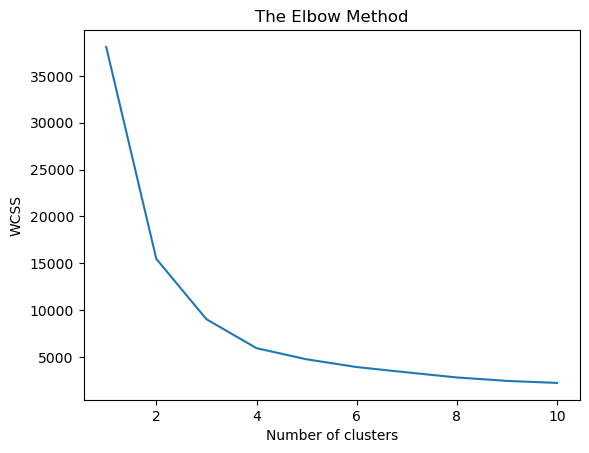

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans =  KMeans(n_clusters = i, init =  'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append( kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [12]:
# To create clusters
#kmeans
kmeans =  KMeans(n_clusters = i, init =  'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\siva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\siva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
labels = kmeans.labels_
data['Cluster'] = labels


<function matplotlib.pyplot.show(close=None, block=None)>

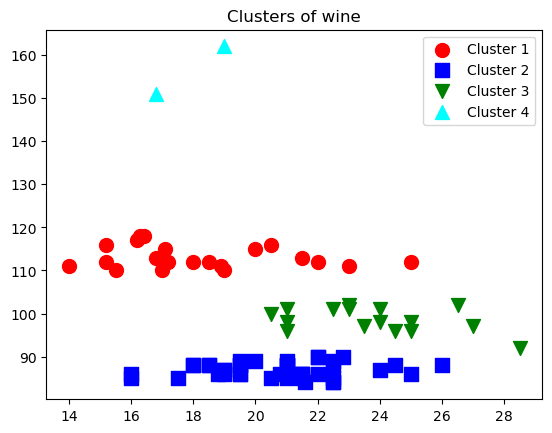

In [38]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label ='Cluster 1', marker = 'o') 
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2',marker = 's' )
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3', marker = 'v' )
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4', marker = '^')  
plt.title('Clusters of wine')
plt.legend()
plt.show


In [39]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,7
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,9
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,7
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,7


In [41]:
from sklearn.metrics import silhouette_score

In [43]:
#silhouette score of kmeans clustering

silhouette_avg1 = silhouette_score(X,y_kmeans)
print(silhouette_avg1)

0.379066330474094


# Agglomerative Clustering

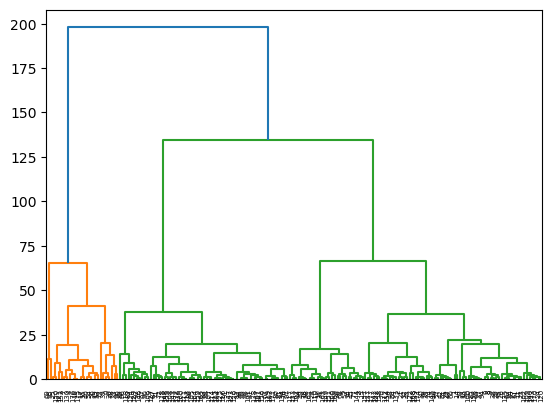

In [45]:
import scipy.cluster. hierarchy as sch
dendrogram =  sch.dendrogram(sch.linkage(X, method = 'ward'))
 

In [64]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering  (n_clusters = 4, affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(X)
   

C:\Users\siva\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


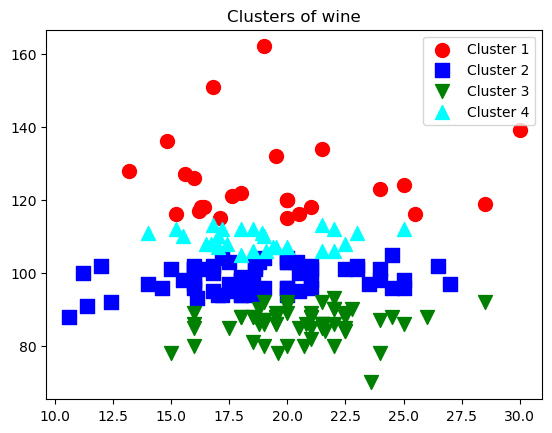

In [65]:
#plotting data points from cluster 1
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 100, c = 'red', label ='Cluster 1',marker = 'o') 

#plt.scatter(X[y_hc == 0,0] represents the x-cordinates of the datapoints in Cluster 0) 
#plt.scatter(X[y_hc == 0,1] represents the y-cordinates of the datapoints in Cluster 0) 

#plotting data points from cluster 2
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2',marker = 's')

#plotting data points from cluster 3
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s =100, c = 'green', label = 'Cluster 3', marker = 'v')

#plotting data points from cluster 4
plt.scatter(X[y_hc == 3,0], X[y_hc== 3,1], s = 100, c = 'cyan', label = 'Cluster 4', marker = '^') 


plt.title('Clusters of wine')

plt.legend()
plt.show()



In [66]:
silhouette_avg1 = silhouette_score(X,y_hc)
print(silhouette_avg1)



0.40546674840185654
